In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight') 
%matplotlib inline

pd.pandas.set_option("display.max_columns",None)
#Basic Monthly Salary x 12) / (Total Working Days in a Year) = DAILY RATE
#Hourly Rate=monthly salary*12/365/8

In [2]:
dataset=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>0]

In [7]:
features_with_na

[]

In [8]:
dataset.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
# list of numerical variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
dataset[numerical_features].head()

Number of numerical variables:  26


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2


In [10]:
numerical_features

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [11]:
# list of variables that contain year information
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

year_feature

['TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [12]:
# let's explore the content of these year variables
for feature in year_feature:
    print(feature, dataset[feature].unique())

TotalWorkingYears [ 8 10  7  6 12  1 17  5  3 31 13  0 26 24 22  9 19  2 23 14 15  4 29 28
 21 25 20 11 16 37 38 30 40 18 36 34 32 33 35 27]
TrainingTimesLastYear [0 3 2 5 1 4 6]
YearsAtCompany [ 6 10  0  8  2  7  1  9  5  4 25  3 12 14 22 15 27 21 17 11 13 37 16 20
 40 24 33 19 36 18 29 31 32 34 26 30 23]
YearsInCurrentRole [ 4  7  0  2  5  9  8  3  6 13  1 15 14 16 11 10 12 18 17]
YearsSinceLastPromotion [ 0  1  3  2  7  4  8  6  5 15  9 13 12 10 11 14]
YearsWithCurrManager [ 5  7  0  2  6  8  3 11 17  1  4 12  9 10 15 13 16 14]


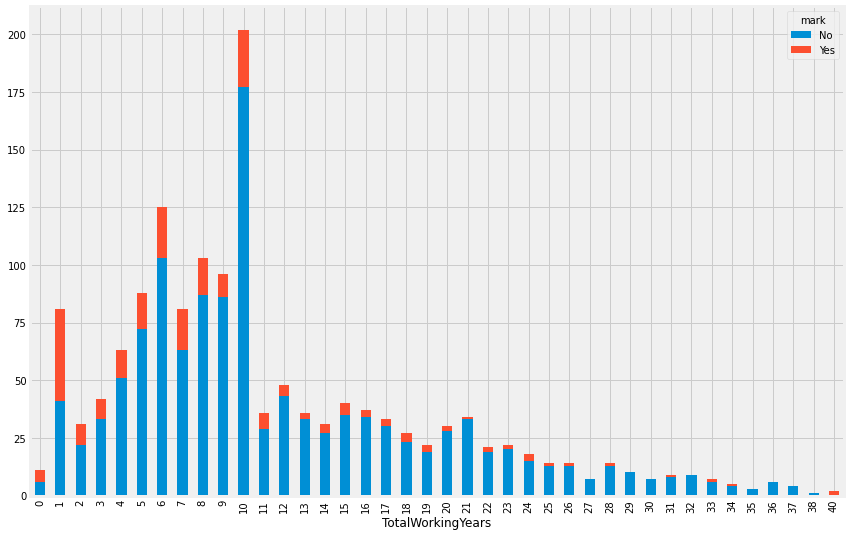

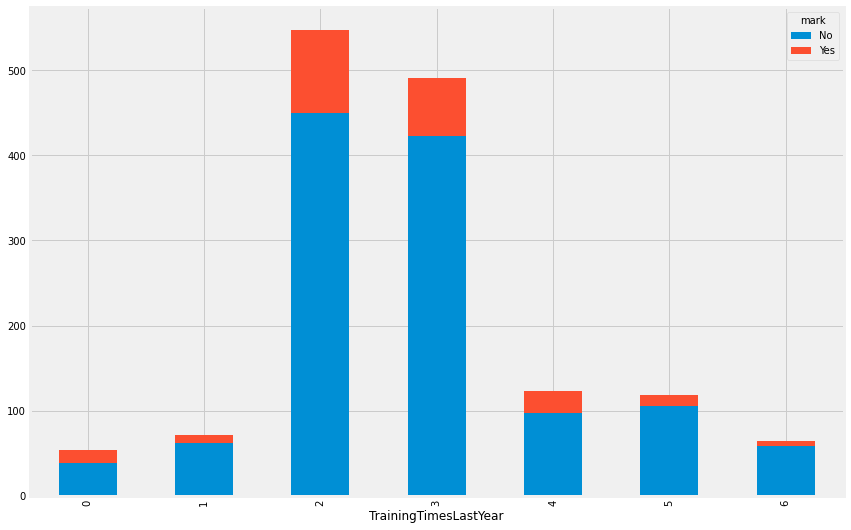

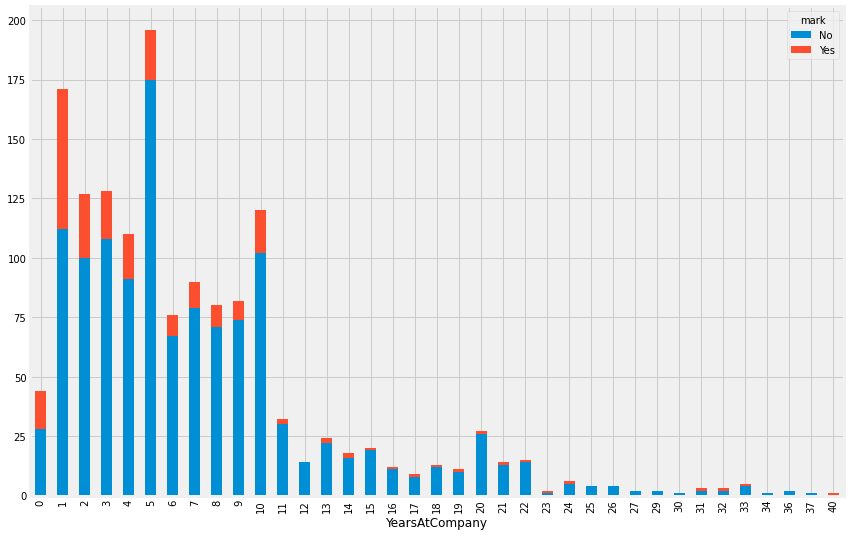

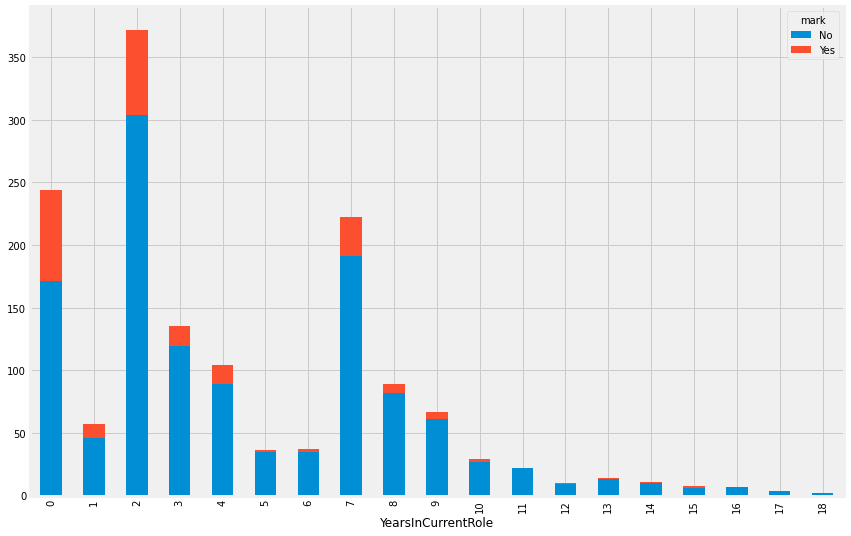

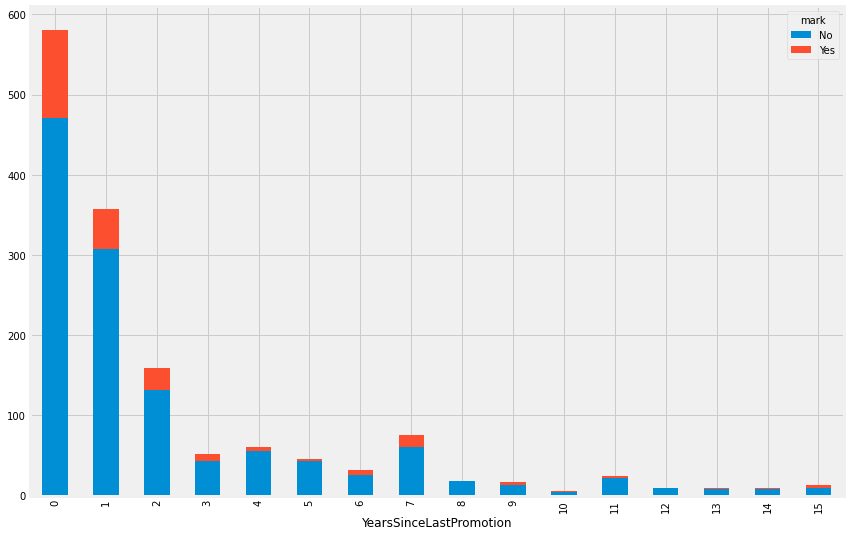

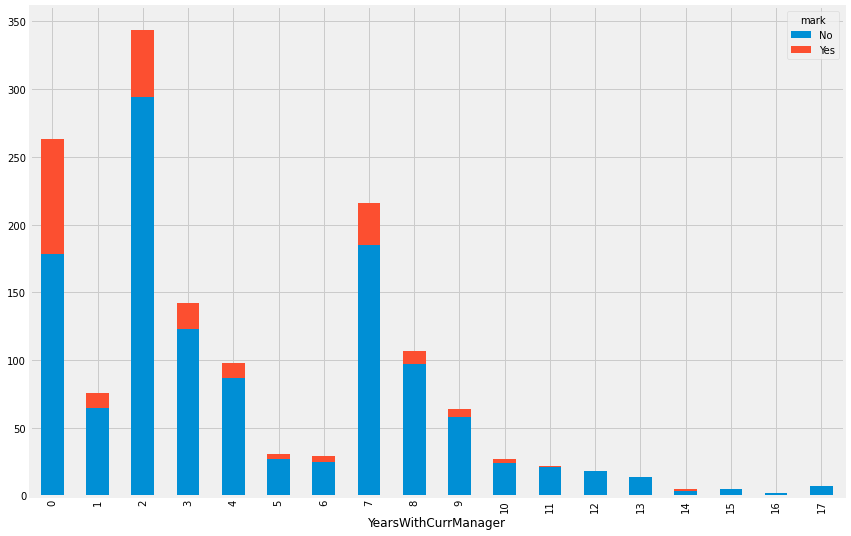

In [13]:
pd.pandas.set_option("display.max_columns",None)
for feature in year_feature:
    plt.rcParams['figure.figsize'] = (13, 9)
    Y = pd.crosstab(dataset[feature], dataset['Attrition'])
    #print(Y)
    #showing percentage of yes or no in table booking as per rate ...in rate 4.7 there is 32% no and 67% yes
    # print(Y.div(Y.sum(1).astype(float), axis = 0))
    #ct = pd.crosstab(zomato_real.rate, zomato_real.book_table)

    Y.plot.bar(stacked=True)
    plt.legend(title='mark')

    plt.show()

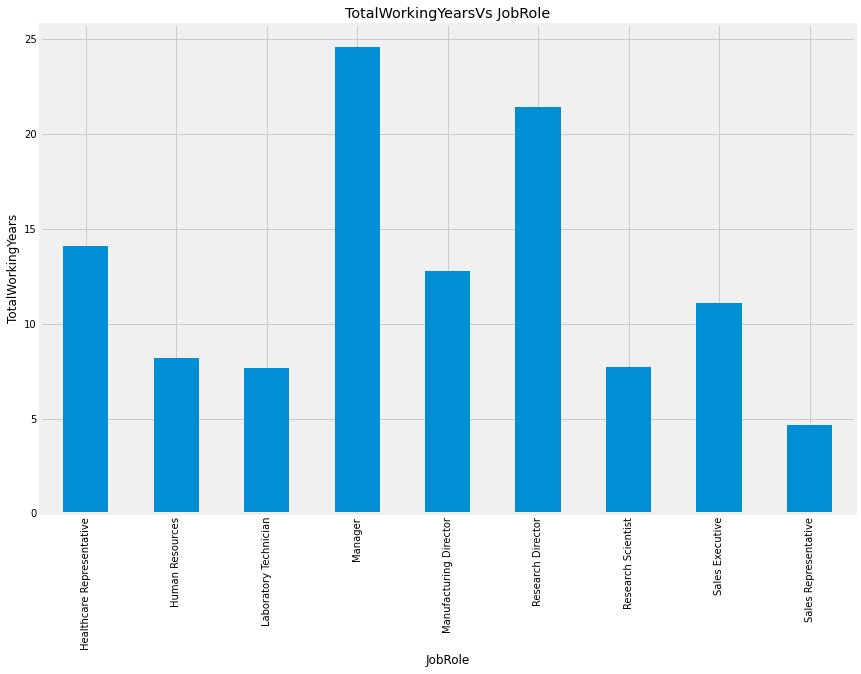

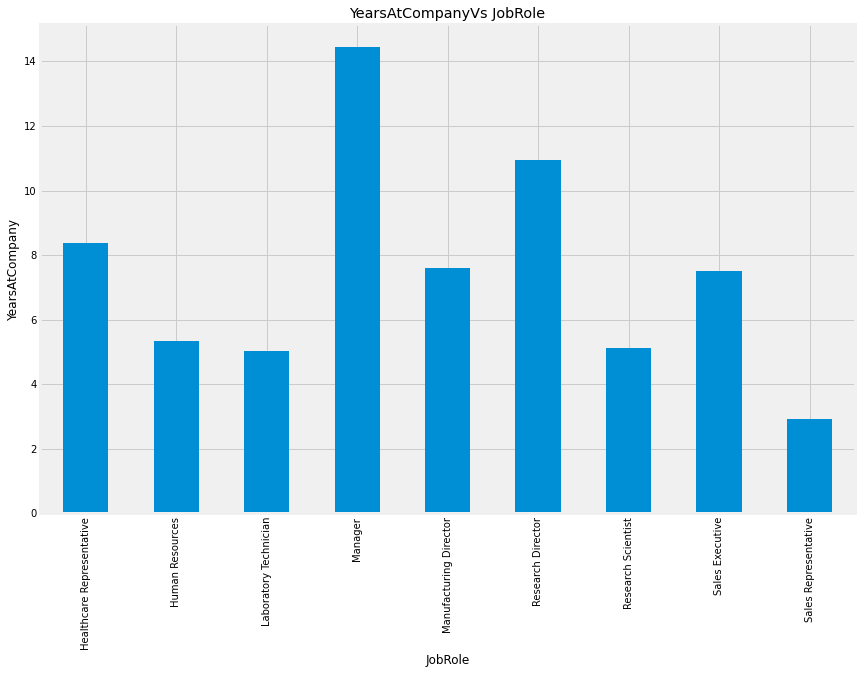

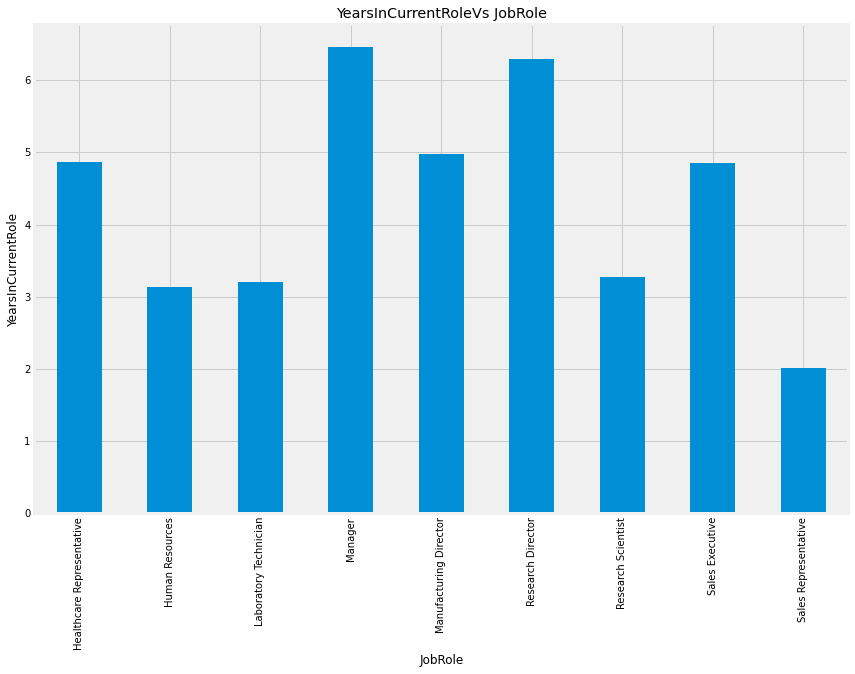

In [14]:
x=['TotalWorkingYears','YearsAtCompany','YearsInCurrentRole']
for feature in x:
    dataset.groupby('JobRole')[feature].mean().plot.bar()
    plt.xlabel('JobRole')
    plt.ylabel(feature)
    plt.title(feature+"Vs JobRole")
    plt.show()

In [15]:

discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<25 and feature not in year_feature+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 13


In [16]:
discrete_feature

['Education',
 'EmployeeCount',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'WorkLifeBalance']

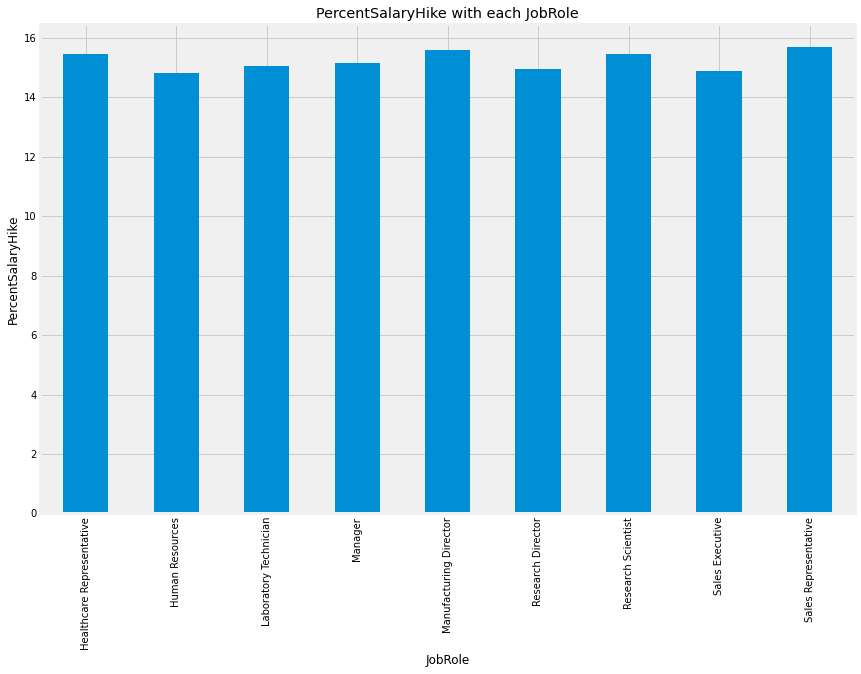

In [17]:
dataset.groupby('JobRole')['PercentSalaryHike'].mean().plot.bar()
plt.xlabel('JobRole')
plt.ylabel('PercentSalaryHike')
plt.title("PercentSalaryHike with each JobRole")
plt.show()

C:\Users\Khowsalya\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Khowsalya\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Khowsalya\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Education count')

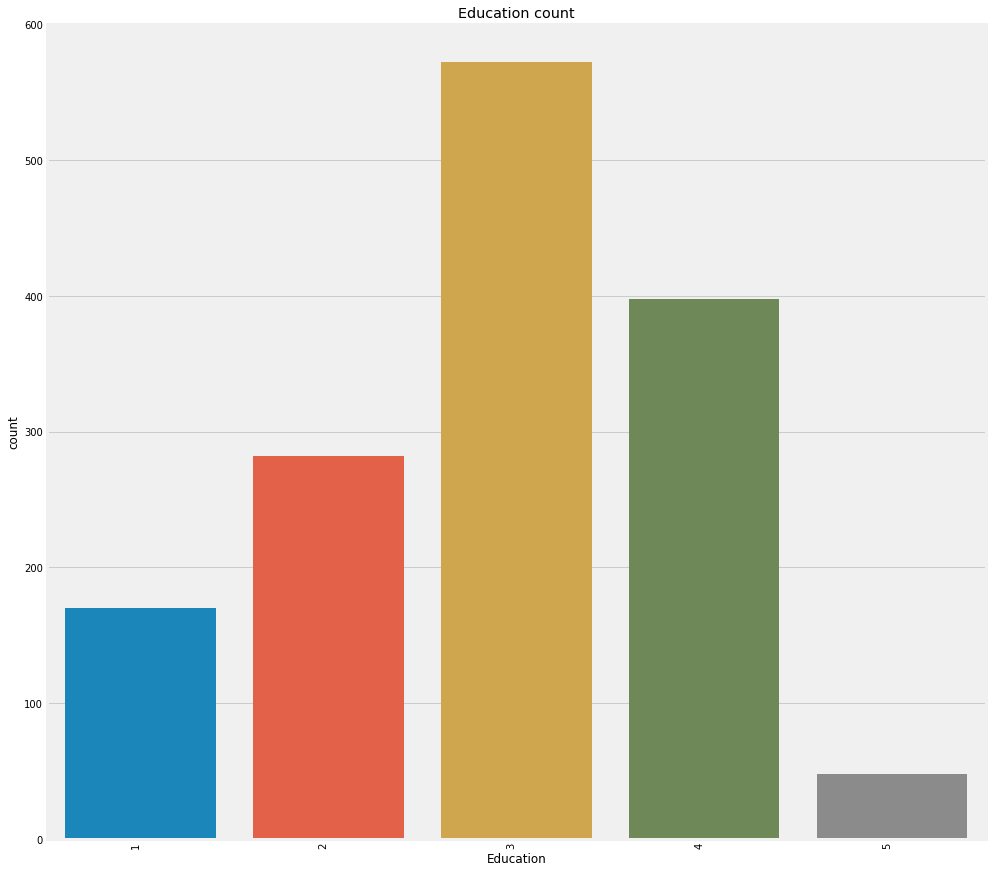

In [18]:
sns.countplot(dataset['Education'])
#xticklabel for making horizontal name display of city into vertical
sns.countplot(dataset['Education']).set_xticklabels(sns.countplot(dataset['Education']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Education count')

C:\Users\Khowsalya\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Khowsalya\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Khowsalya\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'EnvironmentSatisfaction count')

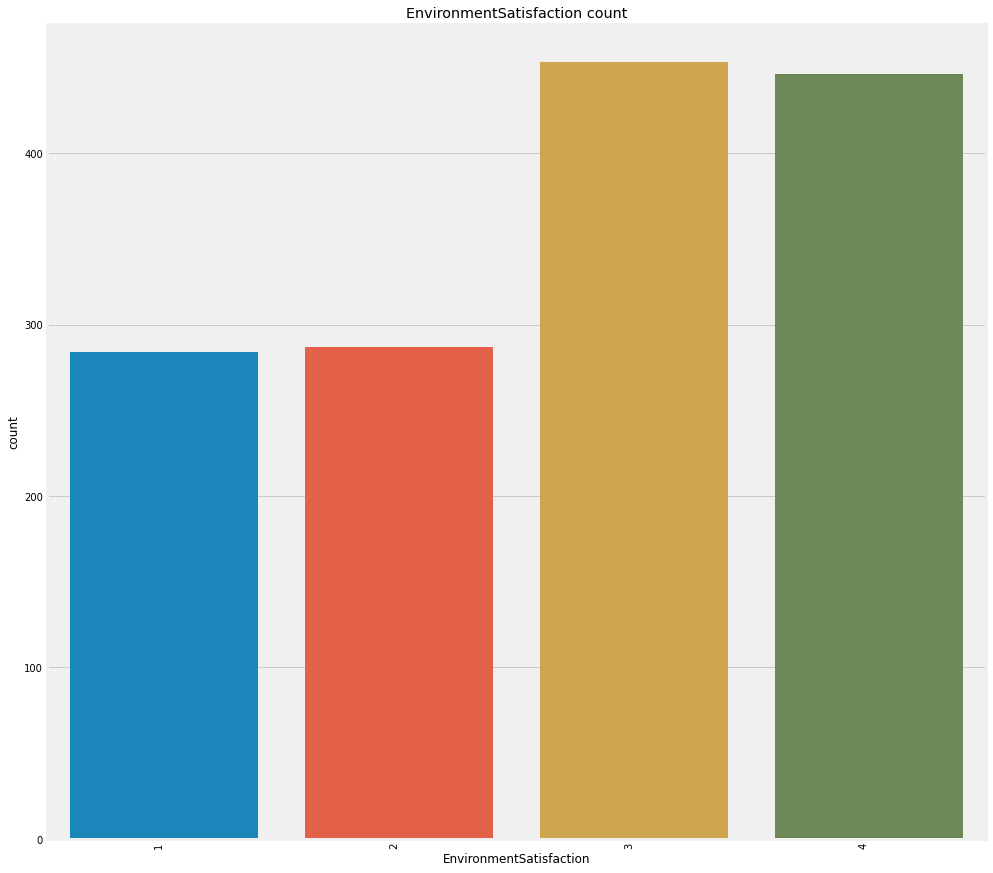

In [19]:
sns.countplot(dataset['EnvironmentSatisfaction'])
#xticklabel for making horizontal name display of city into vertical
sns.countplot(dataset['EnvironmentSatisfaction']).set_xticklabels(sns.countplot(dataset['EnvironmentSatisfaction']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('EnvironmentSatisfaction count')

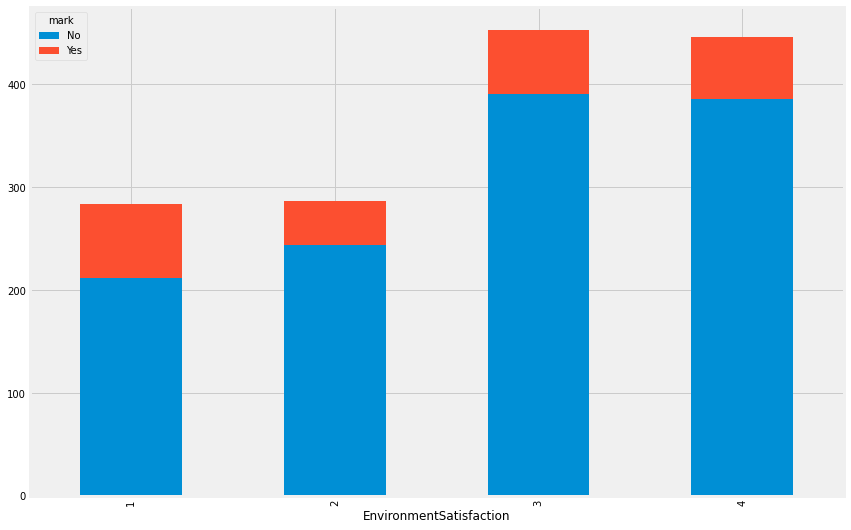

In [20]:
ct =  pd.crosstab(dataset['EnvironmentSatisfaction'], dataset['Attrition'])

ct.plot.bar(stacked=True)
plt.legend(title='mark')

plt.show()

C:\Users\Khowsalya\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Khowsalya\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Khowsalya\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'JobSatisfaction count')

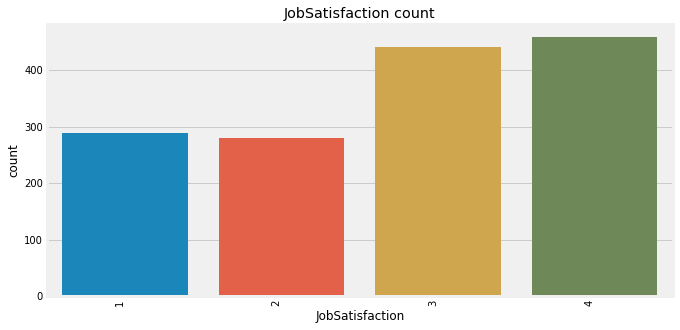

In [21]:

sns.countplot(dataset['JobSatisfaction'])
#xticklabel for making horizontal name display of city into vertical
sns.countplot(dataset['JobSatisfaction']).set_xticklabels(sns.countplot(dataset['JobSatisfaction']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(10,5)
plt.title('JobSatisfaction count')

C:\Users\Khowsalya\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Khowsalya\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Khowsalya\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'JobInvolvement count')

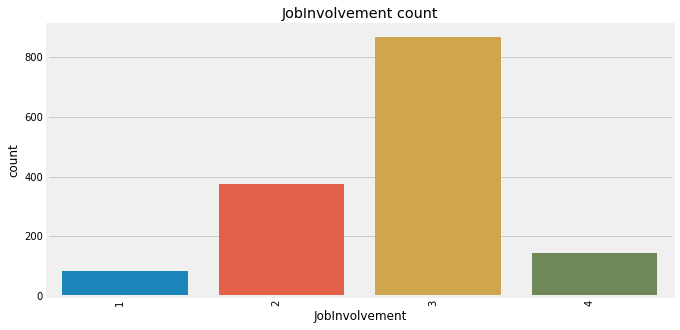

In [22]:

sns.countplot(dataset['JobInvolvement'])
#xticklabel for making horizontal name display of city into vertical
sns.countplot(dataset['JobInvolvement']).set_xticklabels(sns.countplot(dataset['JobInvolvement']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(10,5)
plt.title('JobInvolvement count')

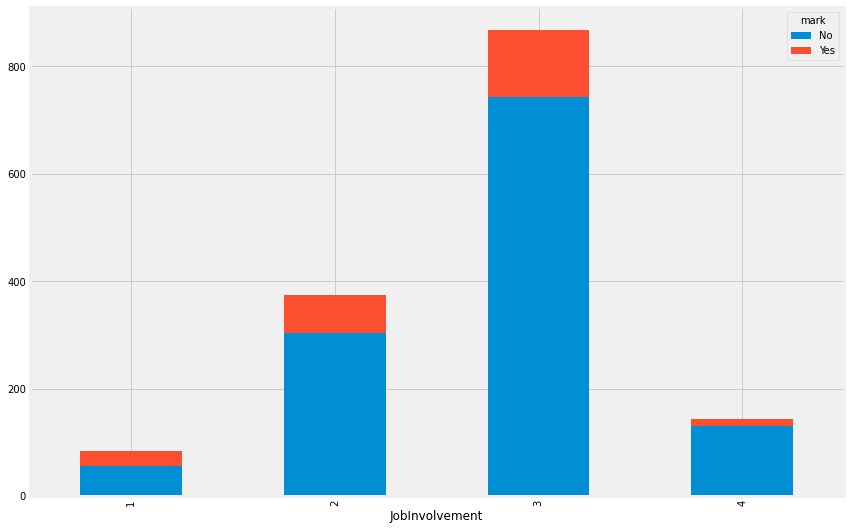

In [23]:
ct =  pd.crosstab(dataset['JobInvolvement'], dataset['Attrition'])

ct.plot.bar(stacked=True)
plt.legend(title='mark')

plt.show()

C:\Users\Khowsalya\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Khowsalya\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Khowsalya\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'JobRole count')

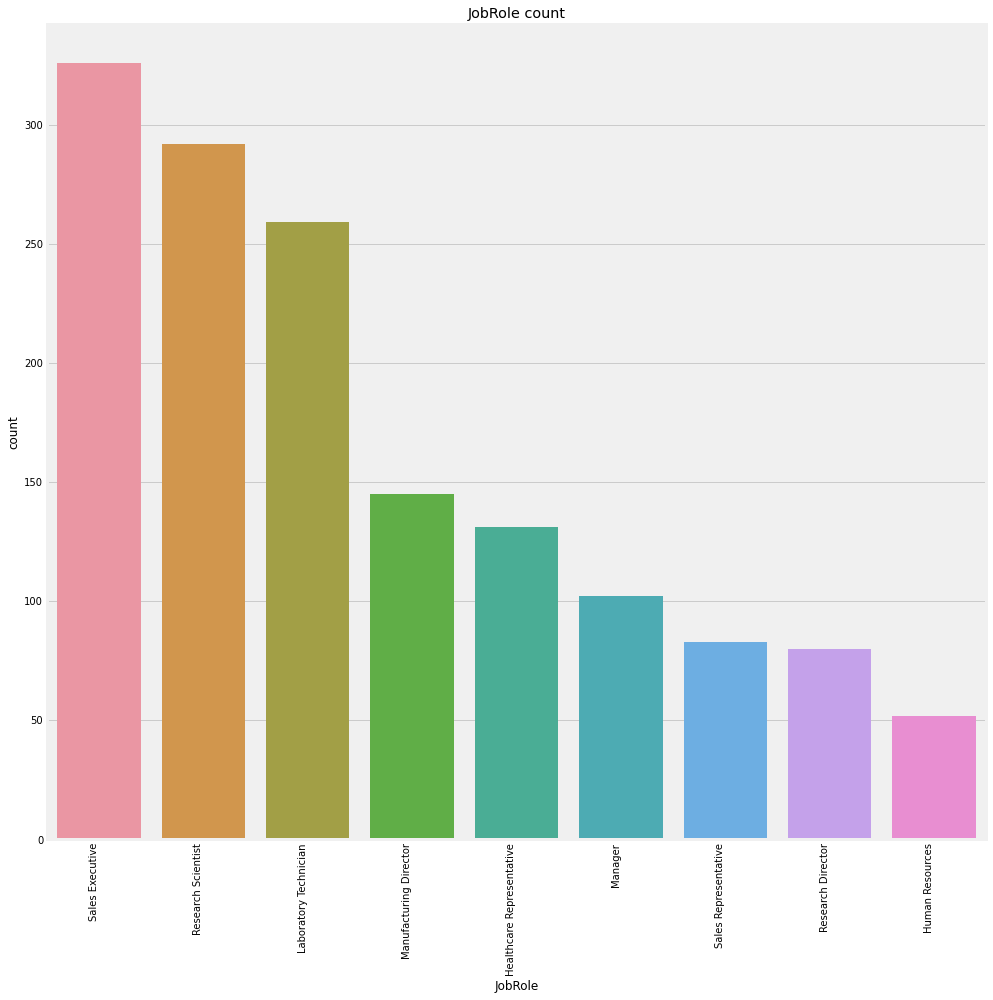

In [24]:
sns.countplot(dataset['JobRole'])
#xticklabel for making horizontal name display of city into vertical
sns.countplot(dataset['JobRole']).set_xticklabels(sns.countplot(dataset['JobRole']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('JobRole count')

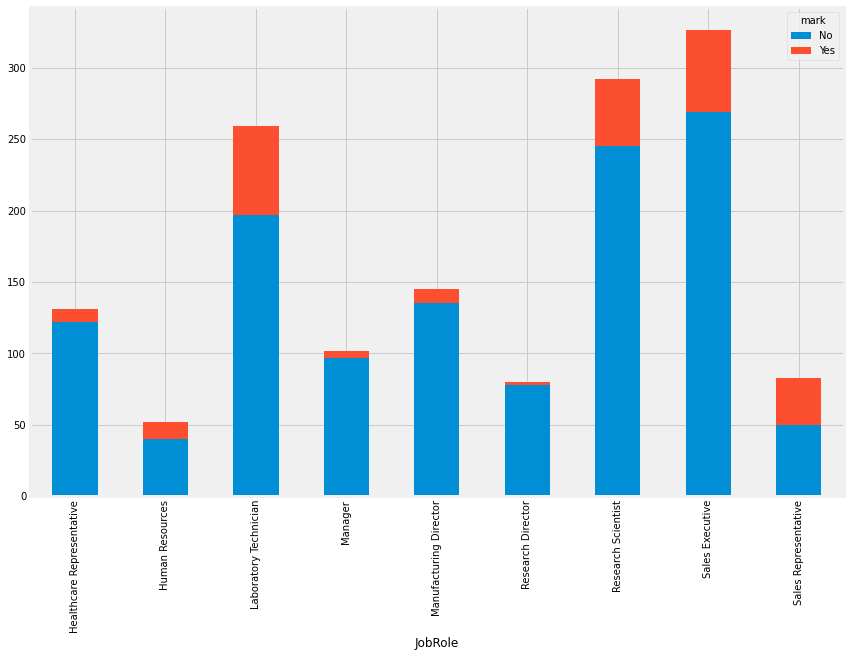

In [25]:
ct =  pd.crosstab(dataset['JobRole'], dataset['Attrition'])

ct.plot.bar(stacked=True)
plt.legend(title='mark')

plt.show()

C:\Users\Khowsalya\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Khowsalya\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Khowsalya\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'NumCompaniesWorked count')

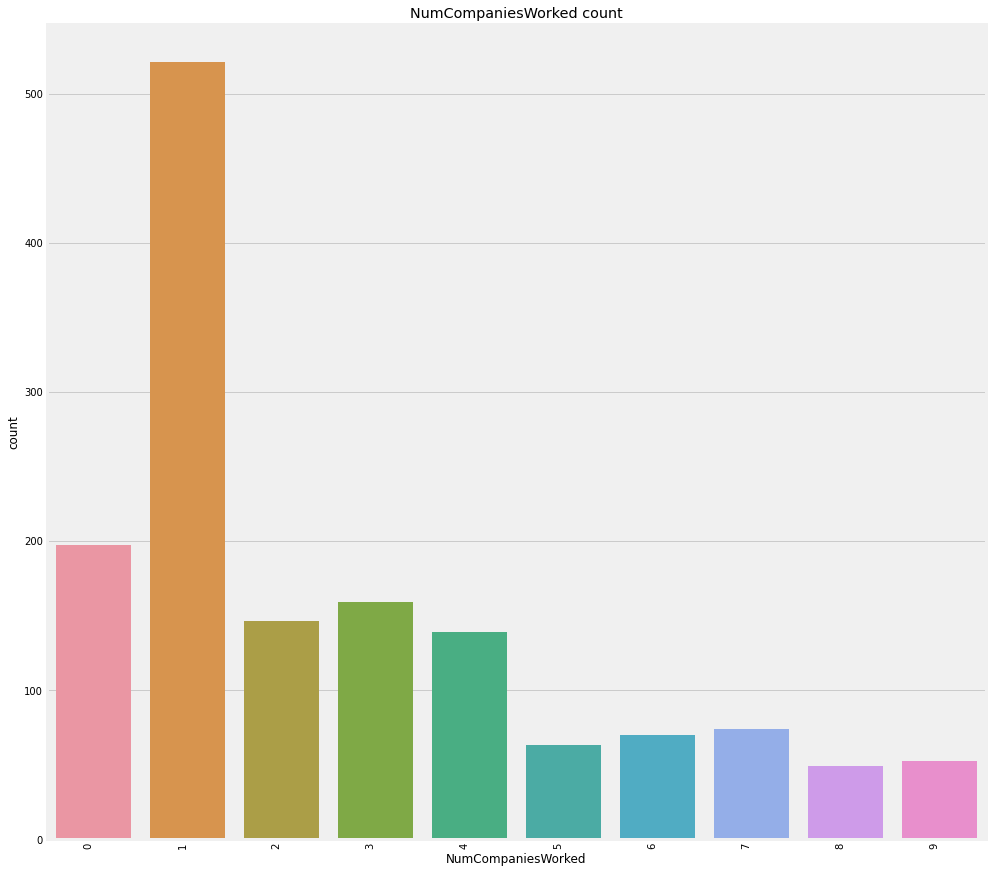

In [26]:
sns.countplot(dataset['NumCompaniesWorked'])
#xticklabel for making horizontal name display of city into vertical
sns.countplot(dataset['NumCompaniesWorked']).set_xticklabels(sns.countplot(dataset['NumCompaniesWorked']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('NumCompaniesWorked count')

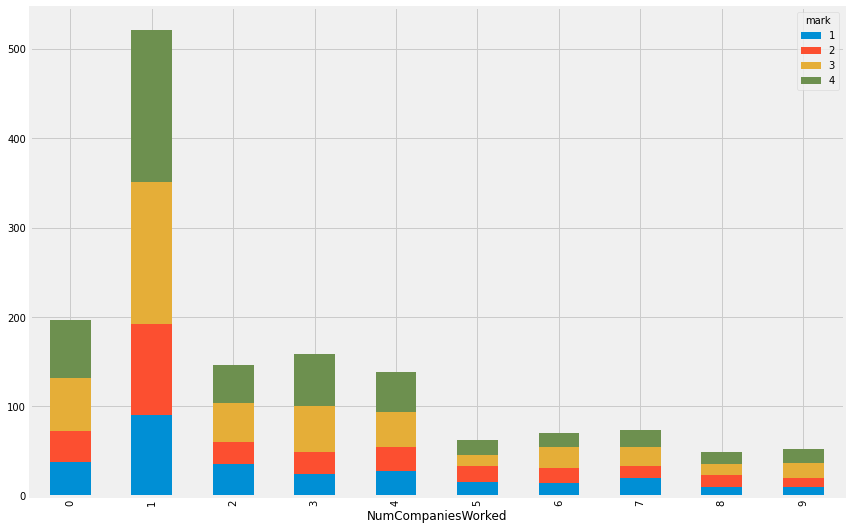

In [27]:
ct =  pd.crosstab(dataset['NumCompaniesWorked'], dataset['JobSatisfaction'])

ct.plot.bar(stacked=True)
plt.legend(title='mark')

plt.show()

C:\Users\Khowsalya\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Khowsalya\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Khowsalya\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'PerformanceRating count')

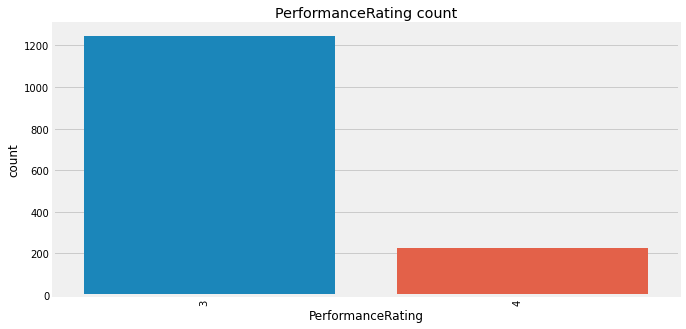

In [28]:
sns.countplot(dataset['PerformanceRating'])
#xticklabel for making horizontal name display of city into vertical
sns.countplot(dataset['PerformanceRating']).set_xticklabels(sns.countplot(dataset['PerformanceRating']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(10,5)
plt.title('PerformanceRating count')

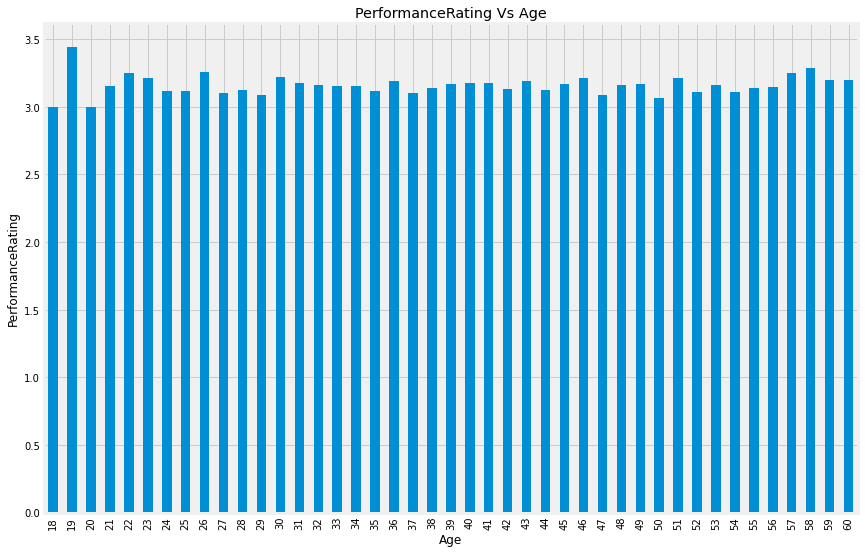

In [29]:
dataset.groupby('Age')['PerformanceRating'].mean().plot.bar()
plt.xlabel('Age')
plt.ylabel('PerformanceRating')
plt.title("PerformanceRating Vs Age")
plt.show()

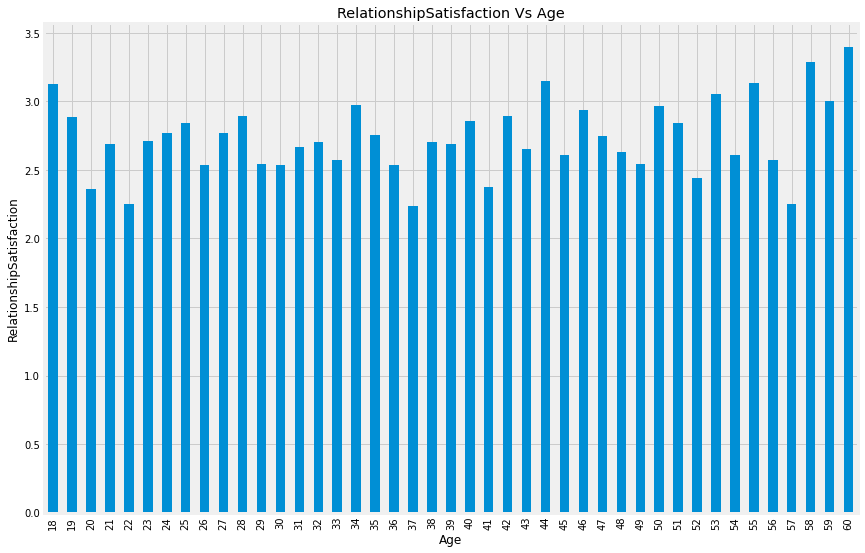

In [30]:
dataset.groupby('Age')['RelationshipSatisfaction'].mean().plot.bar()
plt.xlabel('Age')
plt.ylabel('RelationshipSatisfaction')
plt.title("RelationshipSatisfaction Vs Age")
plt.show()

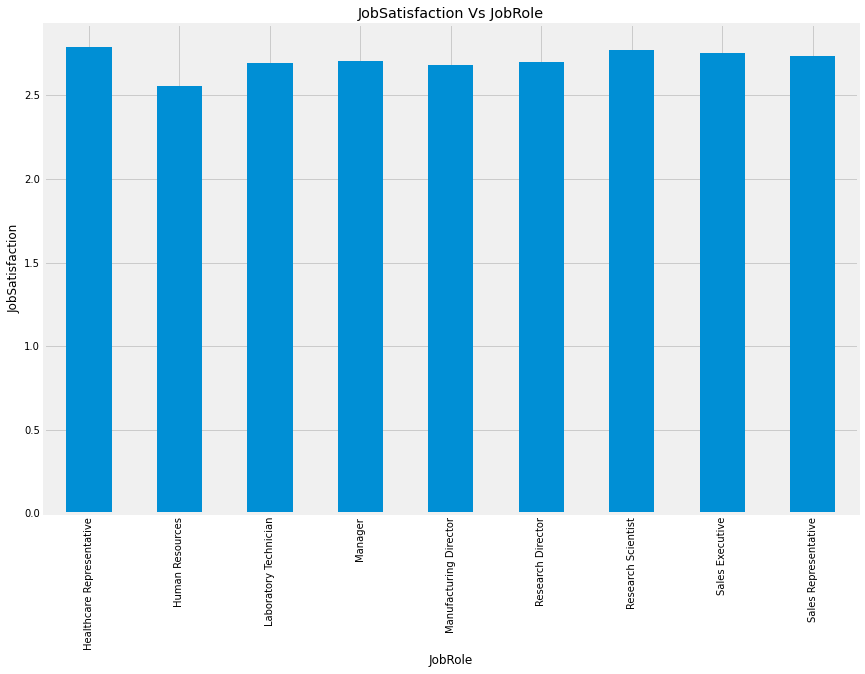

In [31]:
dataset.groupby('JobRole')['JobSatisfaction'].mean().plot.bar()
plt.xlabel('JobRole')
plt.ylabel('JobSatisfaction')
plt.title("JobSatisfaction Vs JobRole")
plt.show()

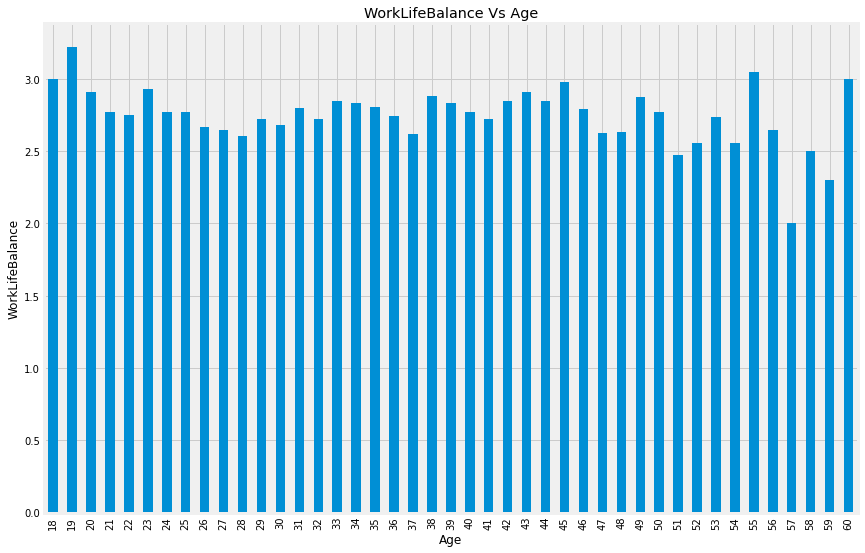

In [32]:
dataset.groupby('Age')['WorkLifeBalance'].mean().plot.bar()
plt.xlabel('Age')
plt.ylabel('WorkLifeBalance')
plt.title("WorkLifeBalance Vs Age")
plt.show()

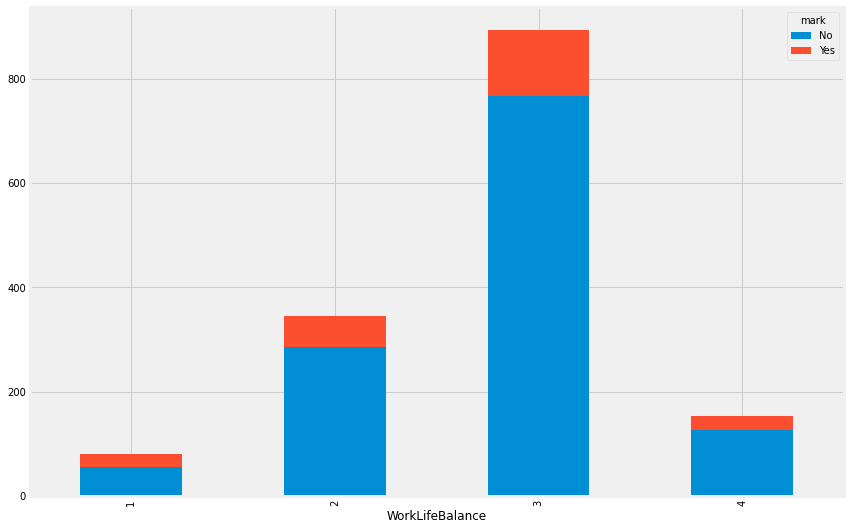

In [33]:
ct =  pd.crosstab(dataset['WorkLifeBalance'], dataset['Attrition'])

ct.plot.bar(stacked=True)
plt.legend(title='mark')

plt.show()

In [34]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 7


In [35]:
continuous_feature

['Age',
 'DailyRate',
 'DistanceFromHome',
 'EmployeeNumber',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate']

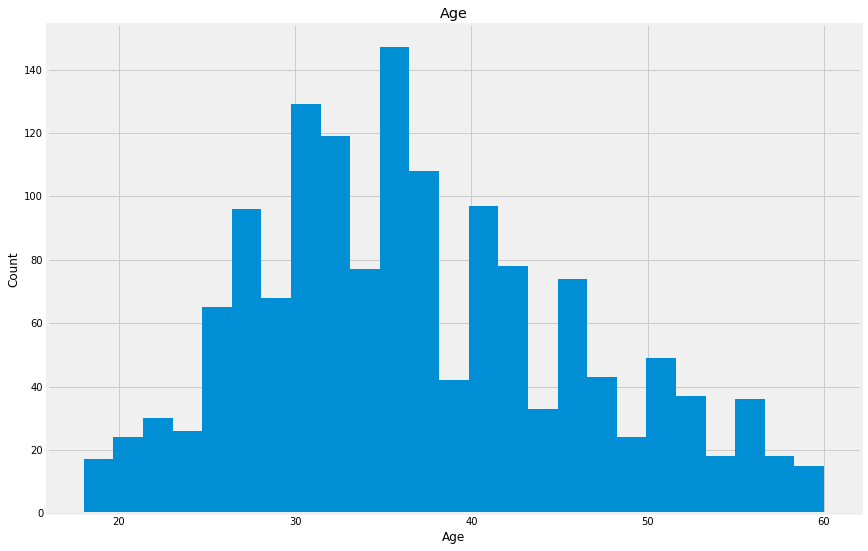

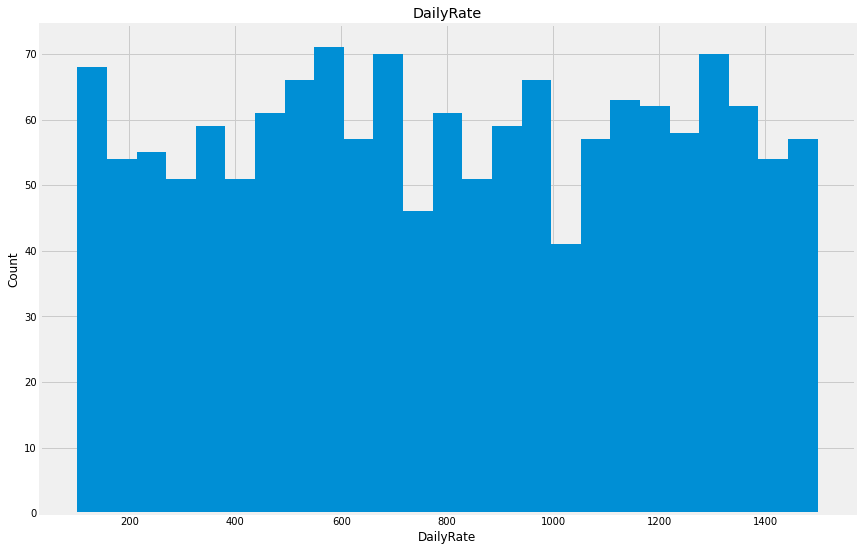

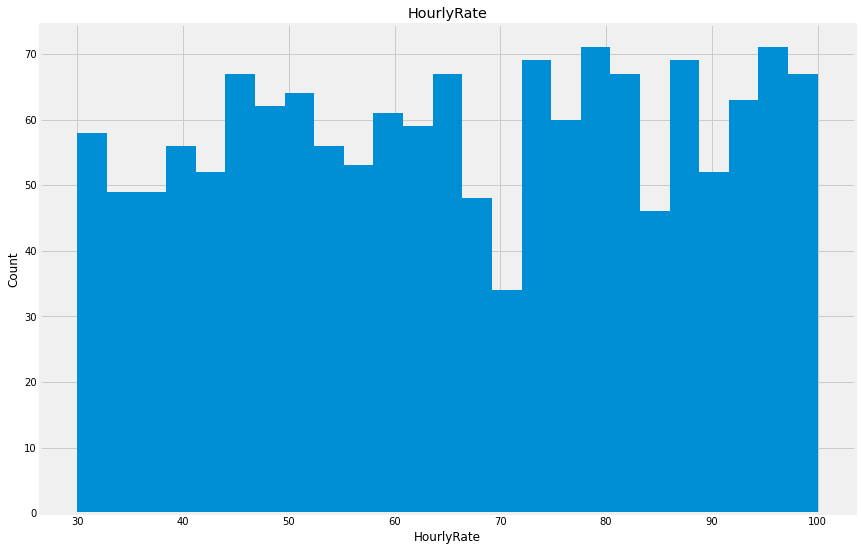

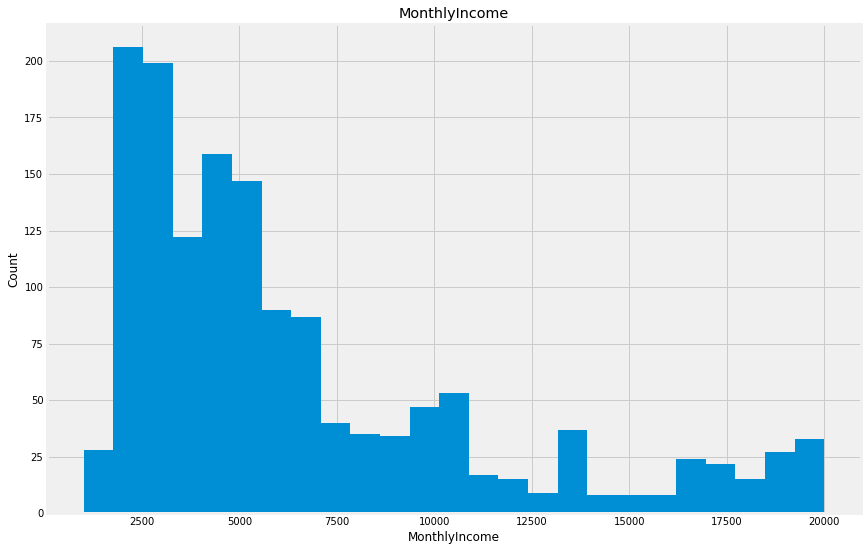

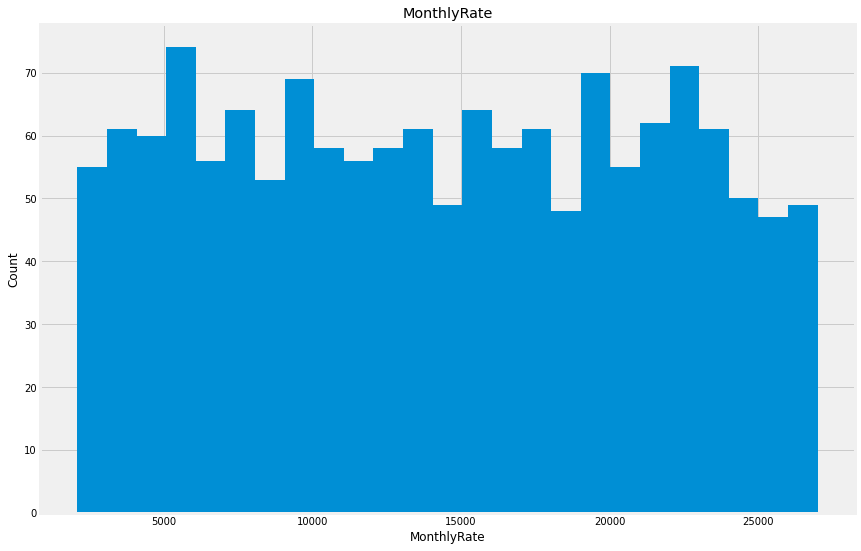

In [36]:
## Lets analyse the continuous values by creating histograms to understand the distribution
x=['Age','DailyRate','HourlyRate','MonthlyIncome','MonthlyRate']
for feature in x:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()


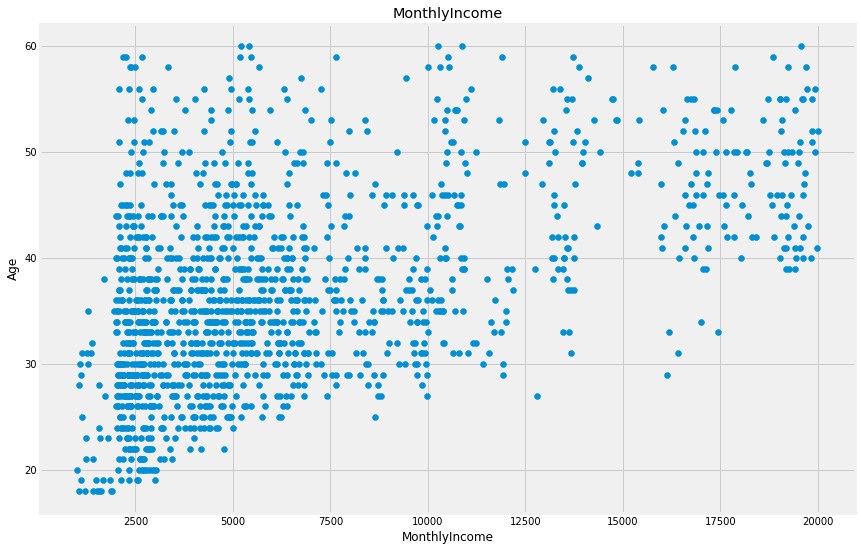

In [37]:
#Age vs monthlyincome
plt.scatter(dataset["MonthlyIncome"],dataset['Age'])
plt.xlabel("MonthlyIncome")
plt.ylabel('Age')
plt.title("MonthlyIncome")
plt.show()

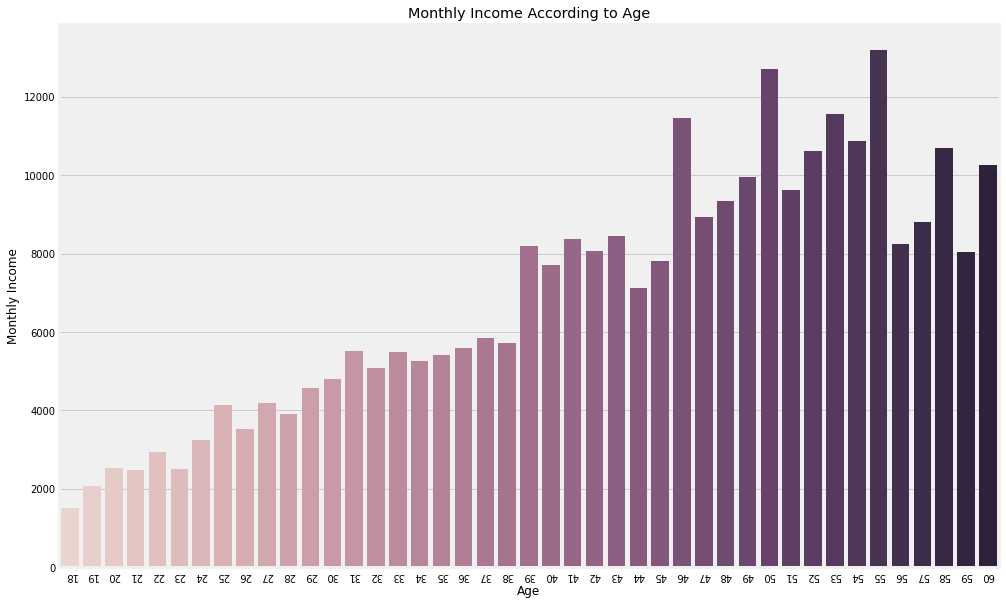

In [38]:

age=pd.DataFrame(dataset.groupby("Age")["MonthlyIncome"].mean())
age.reset_index(level=0, inplace=True)
age.head()
plt.figure(figsize=(15,10))
ax=sns.barplot(x=age.Age,y=age.MonthlyIncome,palette = sns.cubehelix_palette(len(age.index)))
plt.xticks(rotation=180)
plt.xlabel("Age")
plt.ylabel("Monthly Income")
plt.title("Monthly Income According to Age")
plt.show()

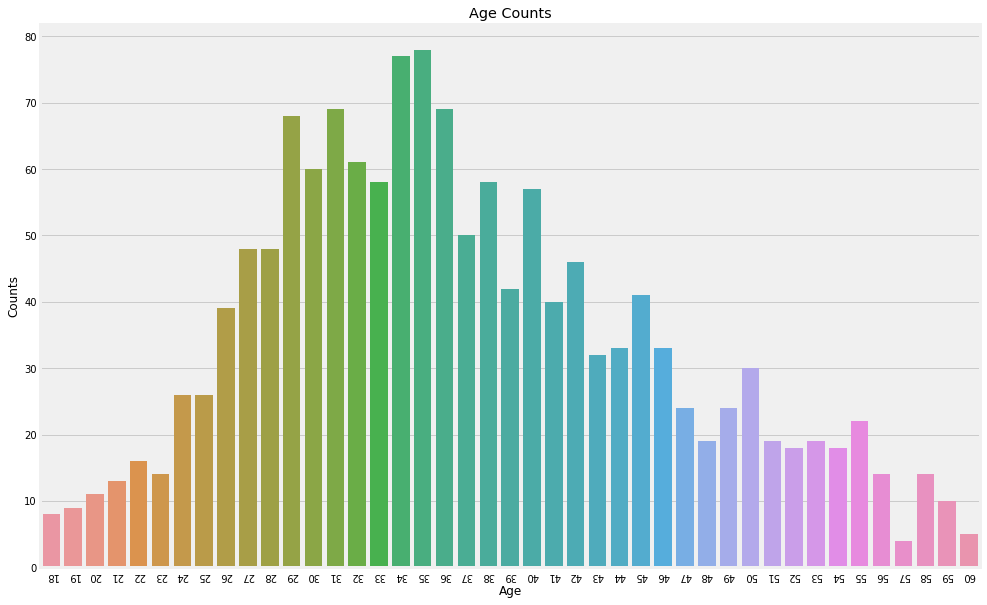

In [39]:
plt.figure(figsize=(15,10))
ax=sns.barplot(x=dataset.Age.value_counts().index, y=dataset.Age.value_counts())
plt.xticks(rotation=180)
plt.xlabel("Age")
plt.ylabel("Counts")
plt.title("Age Counts")
plt.show()

In [40]:
categorical_features=[feature for feature in dataset.columns if data[feature].dtypes=='O']
categorical_features

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

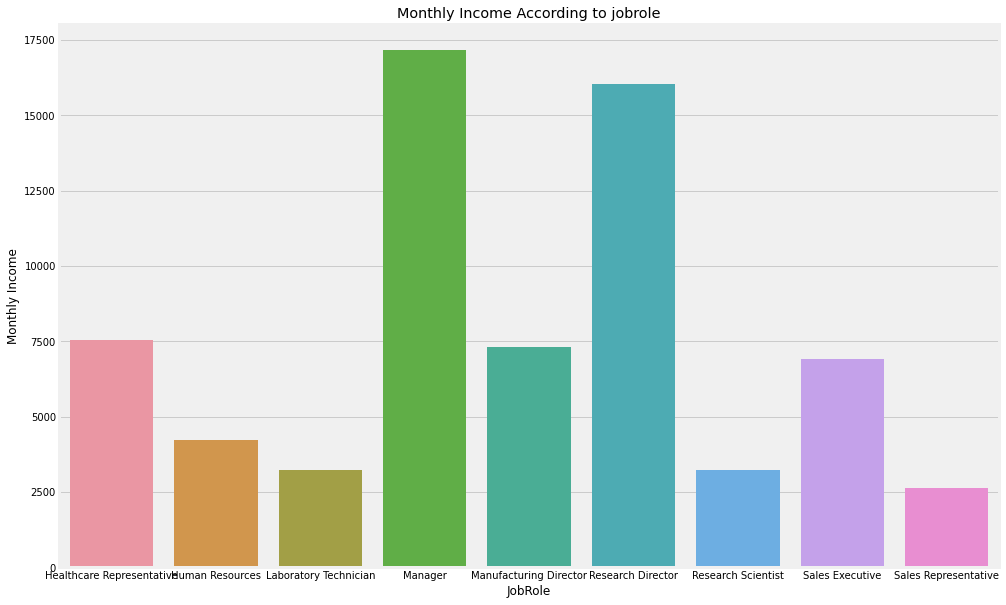

In [41]:

age=pd.DataFrame(dataset.groupby("JobRole")["MonthlyIncome"].mean())
age.reset_index(level=0, inplace=True)
age.head()
plt.figure(figsize=(15,10))
ax=sns.barplot(x=age.JobRole,y=age.MonthlyIncome)
plt.xticks(rotation=360)
plt.xlabel("JobRole")
plt.ylabel("Monthly Income")
plt.title("Monthly Income According to jobrole")
plt.show()

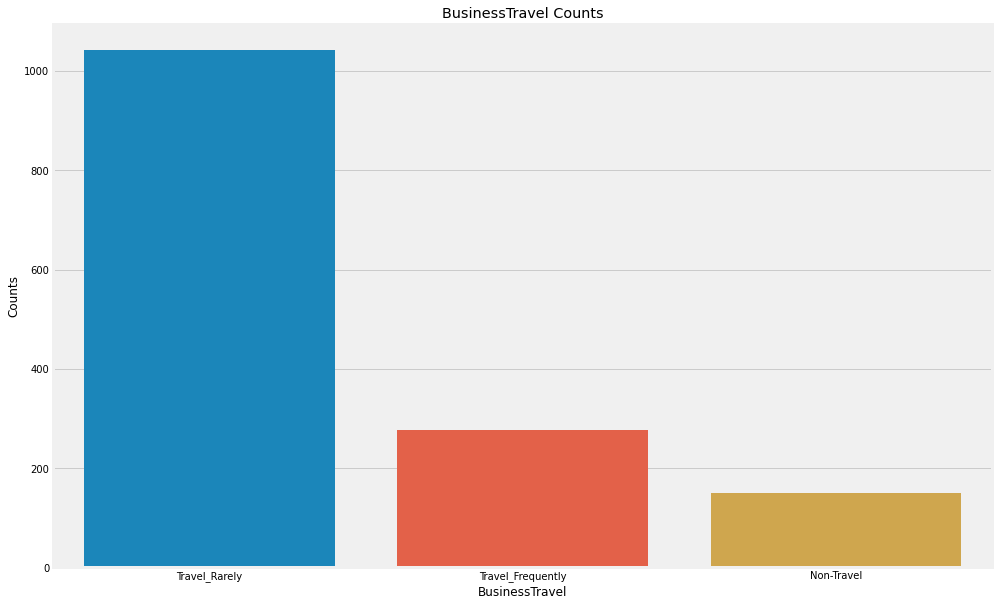

In [42]:
plt.figure(figsize=(15,10))
ax=sns.barplot(x=dataset.BusinessTravel.value_counts().index, y=dataset.BusinessTravel.value_counts())
plt.xticks(rotation=360)
plt.xlabel("BusinessTravel")
plt.ylabel("Counts")
plt.title("BusinessTravel Counts")
plt.show()

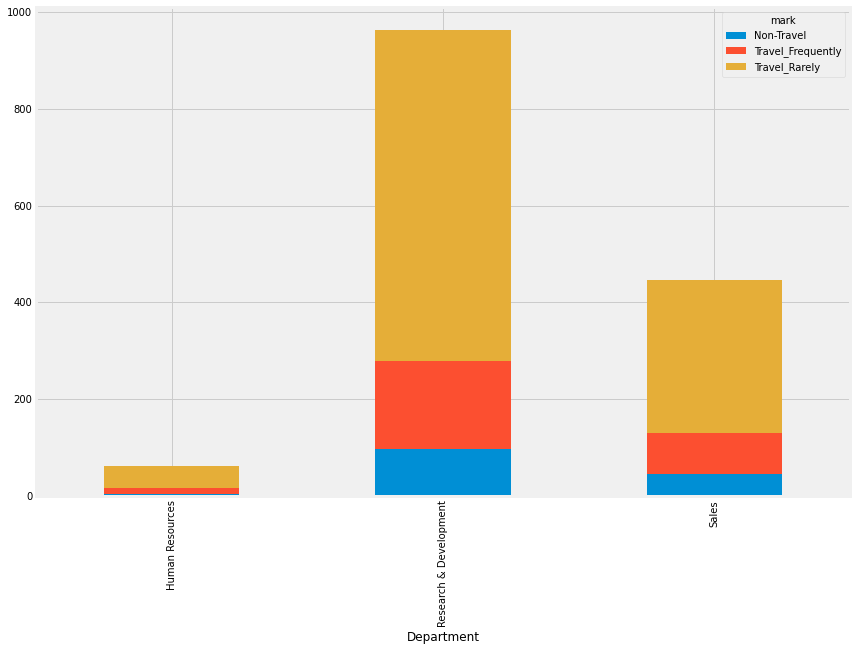

In [43]:
ct =  pd.crosstab(dataset['Department'], dataset['BusinessTravel'])
ct.plot.bar(stacked=True)
plt.legend(title='mark')

plt.show()


In [44]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(dataset[feature].unique())))

The feature is Attrition and number of categories are 2
The feature is BusinessTravel and number of categories are 3
The feature is Department and number of categories are 3
The feature is EducationField and number of categories are 6
The feature is Gender and number of categories are 2
The feature is JobRole and number of categories are 9
The feature is MaritalStatus and number of categories are 3
The feature is Over18 and number of categories are 1
The feature is OverTime and number of categories are 2


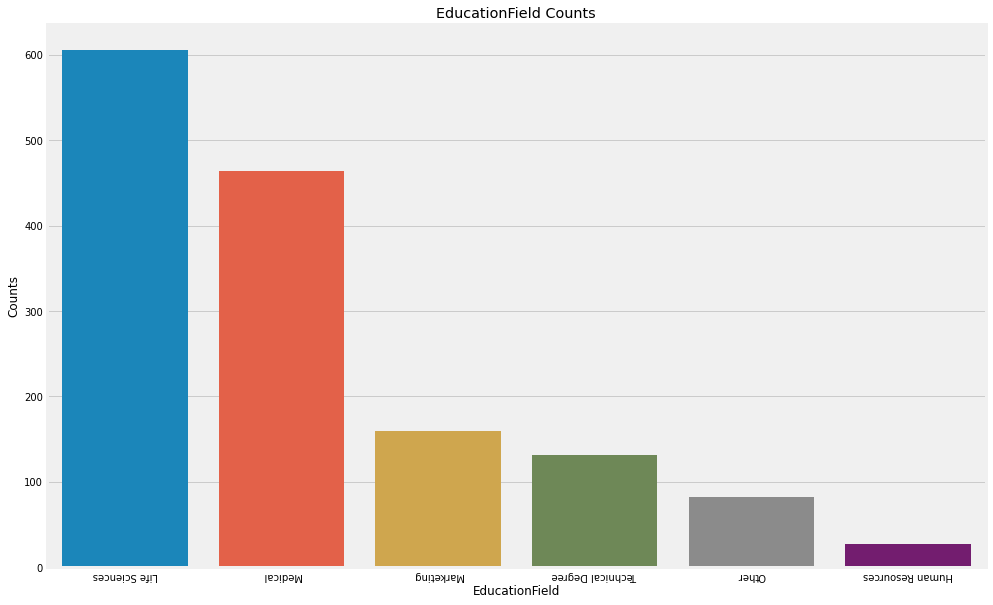

In [45]:
plt.figure(figsize=(15,10))
ax=sns.barplot(x=dataset.EducationField.value_counts().index, y=dataset.EducationField.value_counts())
plt.xticks(rotation=180)
plt.xlabel("EducationField")
plt.ylabel("Counts")
plt.title("EducationField Counts")
plt.show()

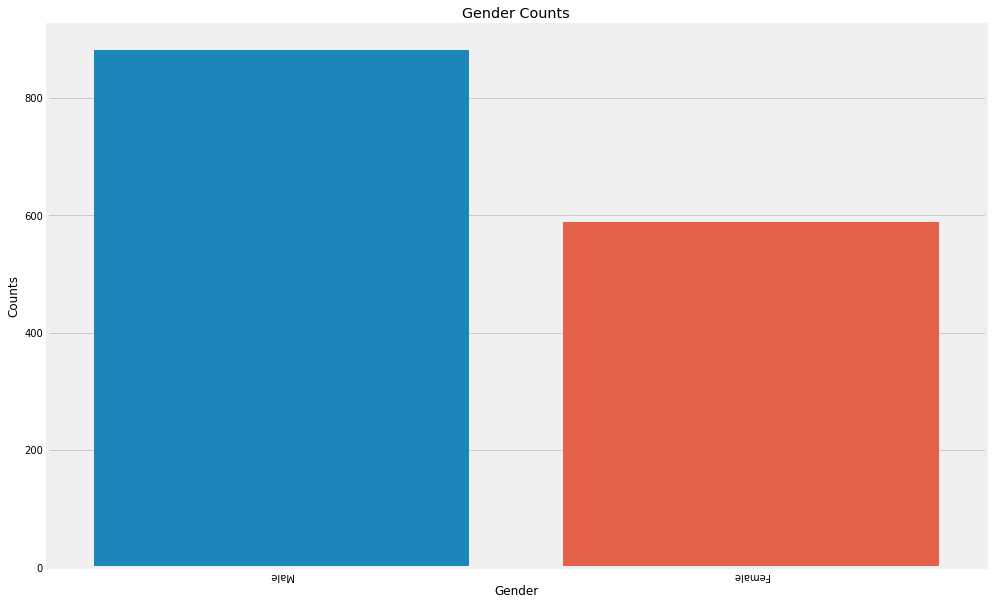

In [46]:
plt.figure(figsize=(15,10))
ax=sns.barplot(x=dataset.Gender.value_counts().index, y=dataset.Gender.value_counts())
plt.xticks(rotation=180)
plt.xlabel("Gender")
plt.ylabel("Counts")
plt.title("Gender Counts")
plt.show()

In [47]:
labels=data.EducationField.value_counts().index
labels

Index(['Life Sciences', 'Medical', 'Marketing', 'Technical Degree', 'Other',
       'Human Resources'],
      dtype='object')

In [48]:
colors=["cyan","orange","hotpink","green","navy","#9b59b6"]

In [49]:
sizes=data.EducationField.value_counts().values
sizes

array([606, 464, 159, 132,  82,  27], dtype=int64)

Text(0.5, 1.0, 'Education Field Counts')

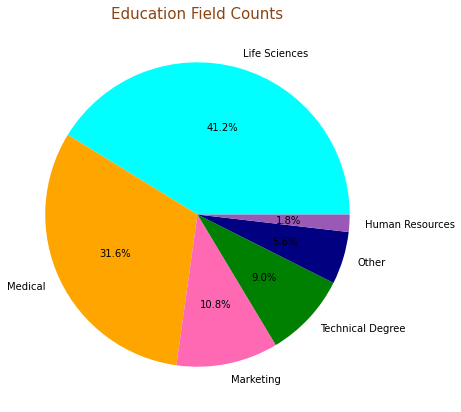

In [50]:
plt.figure(figsize=(7,7))
plt.pie(sizes,labels=labels,colors=colors,autopct="%1.1f%%")
plt.title("Education Field Counts",color="saddlebrown",fontsize=15)

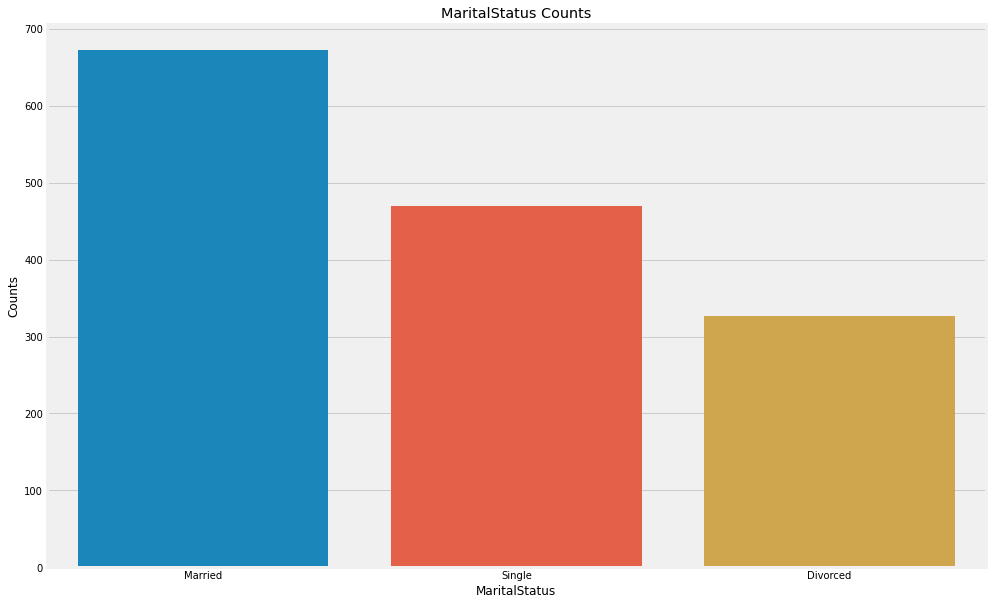

In [51]:
plt.figure(figsize=(15,10))
ax=sns.barplot(x=dataset.MaritalStatus.value_counts().index, y=dataset.MaritalStatus.value_counts())
plt.xticks(rotation=360)
plt.xlabel("MaritalStatus")
plt.ylabel("Counts")
plt.title("MaritalStatus Counts")
plt.show()

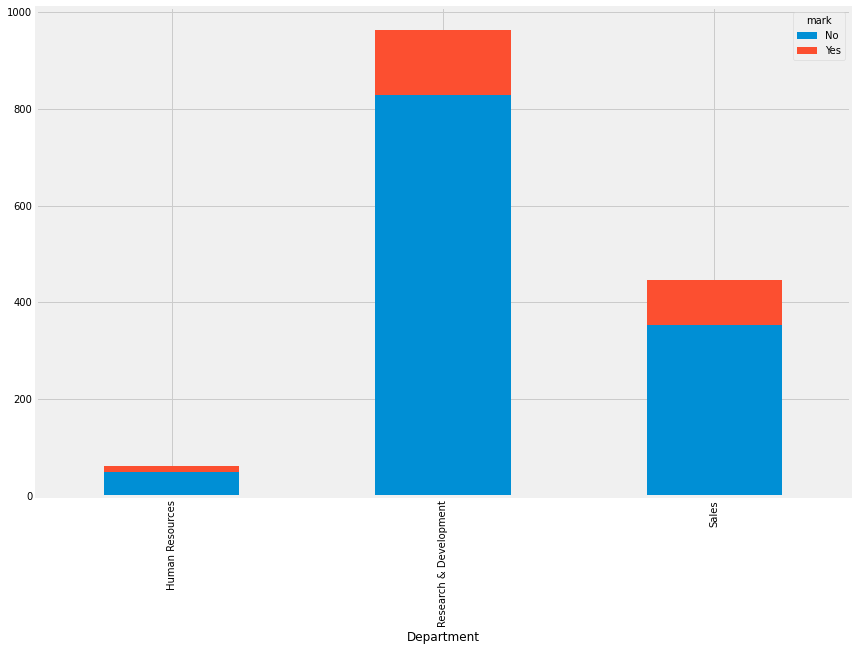

In [52]:
ct =  pd.crosstab(dataset['Department'], dataset['Attrition'])
ct.plot.bar(stacked=True)
plt.legend(title='mark')

plt.show()

In [53]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px

In [ ]:
app = dash.Dash(__name__)

app.layout = html.Div([
    html.P("Names:"),
    dcc.Dropdown(
        id='names', 
        value='Department', 
        options=[{'value': x, 'label': x} 
                 for x in ['Department', 'JobRole']],
        clearable=False
    ),
    html.P("Values:"),
    dcc.Dropdown(
        id='values', 
        value='BusinessTravel', 
        options=[{'value': x, 'label': x} 
                 for x in ['BusinessTravel', 'MonthlyIncome']],
        clearable=False
    ),
    dcc.Graph(id="pie-chart"),
])

@app.callback(
    Output("pie-chart", "figure"), 
    [Input("names", "value"), 
     Input("values", "value")])
def generate_chart(names, values):
    fig = px.pie(dataset, values=values, names=names)
    return fig

app.run_server(debug=True, use_reloader=False)

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


In [21]:
import plotly.graph_objects as go

x =dataset['OverTime'].unique()
count= dataset['OverTime'].value_counts()
y=[count[1],count[0]]

# Use textposition='auto' for direct text
fig = go.Figure(data=[go.Bar(
            x=x, y=y,
            text=y,
            textposition='auto',
        )])

fig.show()

In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
import pandas as pd

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

# assume you have a "long-form" data frame
# see https://plotly.com/python/px-arguments/ for more options
x =dataset['OverTime'].unique()
y = dataset['OverTime'].value_counts()

fig = go.Figure(data=[go.Bar(
            x=x, y=y,
            text=y,
            textposition='auto',
        )])

app.layout = html.Div(children=[
    html.H1(children='OverTime'),

    html.Div(children='''
        Dash: Overtime employees count
    '''),

    dcc.Graph(
        id='example-graph',
        figure=fig
    )
])

if __name__ == '__main__':
    app.run_server(debug=True,use_reloader=False)

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


In [12]:
ct =  pd.crosstab(dataset['Age'], dataset['OverTime'])

In [13]:
ct

OverTime,No,Yes
Age,,
18,6,2
19,5,4
20,7,4
21,10,3
22,9,7
23,11,3
24,18,8
25,18,8
26,27,12


In [14]:
dataset['OverTime'].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

In [19]:
x =dataset['OverTime'].unique()
count= dataset['OverTime'].value_counts()
y=[count[1],count[0]]

In [20]:
y

[416, 1054]

C:\Users\Khowsalya\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

21.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



<AxesSubplot:xlabel='OverTime', ylabel='Age'>

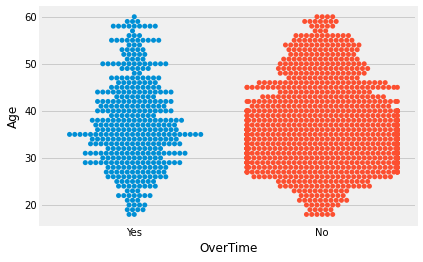

In [24]:
sns.swarmplot(x=dataset['OverTime'], y=dataset['Age'], data=dataset)

In [30]:
dataset=dataset.drop(["EmployeeCount","EmployeeNumber","Over18","StandardHours"], axis = 1)

In [32]:
dataset.shape

(1470, 31)

In [34]:
## Always remember there way always be a chance of data leakage so we need to split the data first and then apply feature
## Engineering
y=dataset['Attrition'].reset_index(drop=True)
y.head()

# from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test=train_test_split(dataset,dataset['SalePrice'],test_size=0.1,random_state=0)

0    Yes
1     No
2    Yes
3     No
4     No
Name: Attrition, dtype: object

In [35]:
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtype=='O']

In [36]:
categorical_features

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [37]:
for feature in categorical_features:
    temp=dataset.groupby(feature)['Attrition'].count()/len(dataset)
    temp_df=temp[temp>0.01].index
    dataset[feature]=np.where(dataset[feature].isin(temp_df),dataset[feature],'Rare_var')

In [39]:
dataset.head(50)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,No,13,3,3,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Yes,20,4,1,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,No,22,4,2,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,No,21,4,2,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,No,13,3,2,2,17,3,2,7,7,7,7


In [61]:
lgb_data = dataset.copy()
lgb_data.head()
lgb_dummy = pd.get_dummies(lgb_data[categorical_features], drop_first=True) # creating dummy values for categoriccal columns
lgb_dummy.head()

,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0


In [62]:
lgb_data.drop(columns = categorical_features, inplace=True) # dropping the old categorical columns
lgb_data.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2


In [63]:
lgb_data = pd.concat([lgb_dummy, lgb_data], axis=1) # concatenating dummy columns to the original dataframe
lgb_data.head()

,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,41,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5
1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,49,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7
2,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,37,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0
3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,33,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0
4,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,27,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2


In [64]:
lgb_data.rename(columns={'Attrition_Yes': 'Attrition'}, inplace=True) # renaming the column
lgb_data.head()

,Attrition,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,41,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5
1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,49,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7
2,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,37,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0
3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,33,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0
4,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,27,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2


In [65]:
y_df = lgb_data['Attrition'].reset_index(drop=True) #  creating the label column
display(y_df.head())


0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: uint8

In [66]:
x_df = lgb_data.drop(columns='Attrition') # selecting the feature columns
x_df.head()

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,41,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5
1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,49,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7
2,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,37,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0
3,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,33,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0
4,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,27,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2


In [67]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x_df, y_df, test_size=0.20) 

In [68]:
print('Sample Training Data')
display(train_x.head())
print('Sample Test Data')
display(test_x.head())

Sample Training Data


,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
625,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,45,930,9,3,4,74,3,3,1,10761,19239,4,12,3,3,1,18,2,3,5,4,0,2
136,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,51,1150,8,4,1,53,1,3,4,10650,25150,2,15,3,4,0,18,2,3,4,2,0,3
963,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,38,1009,2,2,2,31,3,2,1,6893,19461,3,15,3,4,1,11,3,3,7,7,1,7
1245,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,24,897,10,3,1,59,3,1,4,2145,2097,0,14,3,4,1,3,2,3,2,2,2,1
1001,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,37,1462,11,3,1,94,3,1,3,3629,19106,4,18,3,1,0,8,6,3,3,2,0,2


Sample Test Data


,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1444,0,1,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,56,310,7,2,4,72,3,1,3,2339,3666,8,11,3,4,1,14,4,1,10,9,9,8
790,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,33,654,5,3,4,34,2,3,4,7119,21214,4,15,3,3,1,9,2,3,3,2,1,2
853,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,19,645,9,2,3,54,3,1,1,2552,7172,1,25,4,3,0,1,4,3,1,1,0,0
1121,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,36,884,1,4,2,73,3,2,3,6815,21447,6,13,3,1,0,15,5,3,1,0,0,0
1447,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,36,301,15,4,4,88,1,2,4,5406,10436,1,24,4,1,1,15,4,2,15,12,11,11


In [69]:
print('Sample Training Labels')
display(train_y.head())
print('Sample Test Labels')
display(test_y.head())

Sample Training Labels


625     0
136     1
963     0
1245    0
1001    0
Name: Attrition, dtype: uint8

Sample Test Labels


1444    1
790     0
853     0
1121    0
1447    0
Name: Attrition, dtype: uint8

C:\Users\Khowsalya\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



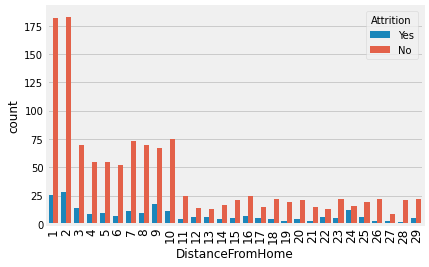

In [5]:
g = sns.countplot('DistanceFromHome',data=dataset,hue='Attrition') # a countplot based on the Education column
g.set_xticklabels(g.get_xticklabels(), rotation = 90, fontsize = 12)
plt.show()